<center>

# Program No. 3
</center>

### <strong> Objective: </strong> Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid Activation Function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [3]:
# XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])


In [4]:
np.random.seed(42)  # For reproducibility

input_neurons = 2
hidden_neurons = 2
output_neurons = 1

# Random weights initialization
weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))

# Bias terms
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Learning rate
lr = 0.5



In [8]:
# List to store loss at each epoch
loss_history = []


In [10]:
epochs = 10000

for epoch in range(epochs):
    # -------- Forward Pass --------
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # -------- Backward Pass --------
    error = y - final_output
    d_output = error * sigmoid_derivative(final_output)

    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # -------- Weights and Bias Update --------
    weights_hidden_output += hidden_output.T.dot(d_output) * lr
    weights_input_hidden += X.T.dot(d_hidden) * lr

    bias_output += np.sum(d_output, axis=0, keepdims=True) * lr
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

    # Store mean absolute error for plotting
    loss_history.append(np.mean(np.abs(error)))

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Error: {loss_history[-1]:.4f}")


Epoch 0 - Error: 0.0283
Epoch 1000 - Error: 0.0272
Epoch 2000 - Error: 0.0262
Epoch 3000 - Error: 0.0252
Epoch 4000 - Error: 0.0244
Epoch 5000 - Error: 0.0236
Epoch 6000 - Error: 0.0228
Epoch 7000 - Error: 0.0221
Epoch 8000 - Error: 0.0214
Epoch 9000 - Error: 0.0208


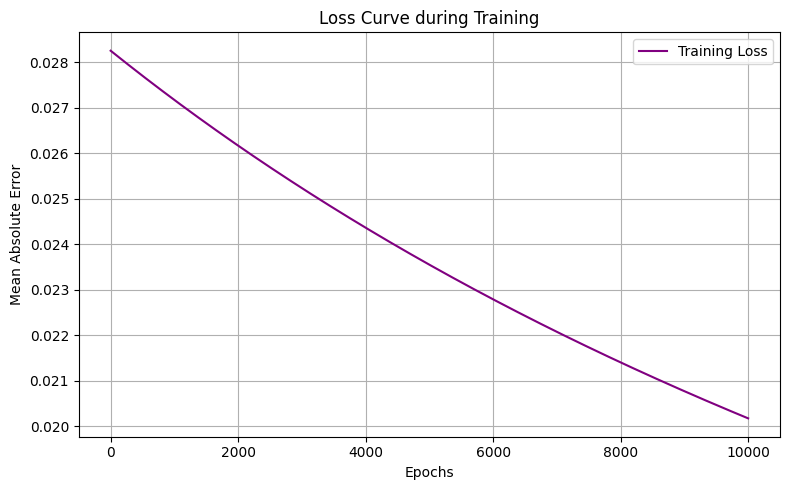

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Training Loss', color='purple')
plt.title('Loss Curve during Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
